1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

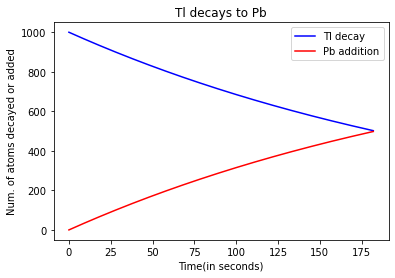

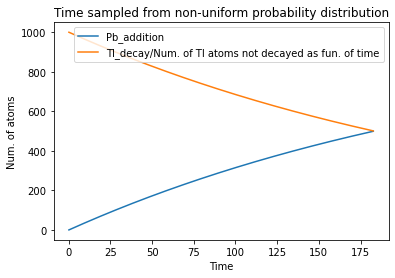

In [10]:
import numpy as np
import matplotlib.pyplot as plt

tau = 3.052*60 #half-life (in sec) 
n_Tl = 1000 #Samples of thallium
n_Pb = 0 #Samples of lead

#probalility that each Tl atom has decayed or not
def p(t,tau=3.052*60):
    return 1-2**(-t/tau)

#I count the total number of Tl atoms that decayed at each step from the Tl sample
Tl_decay = []
for i in range(int(tau)):
    Tl_decay.append(p(i))
    
sample_Tl_decay = n_Tl - np.array(Tl_decay)*n_Tl #decay of Tl from 1000 atoms

#Add this number to the Lead 
Pb_add = np.array(Tl_decay)*1000

#Plot the evolution of the two sets as a function of time
time = np.arange(int(tau))
plt.plot(time, sample_Tl_decay,label='Tl decay',c='b')

plt.plot(time,Pb_add,label='Pb addition',c='r')
plt.title("Tl decays to Pb")
plt.xlabel("Time(in seconds)")
plt.ylabel("Num. of atoms decayed or added")
plt.legend(loc='best')
plt.show()

#Repeat the exercise by means of the inverse transform method

#Draw 1000 random numbers from the non-uniform probability distribution 𝑝(𝑡) to represent the times of decay of the 1000 Tl atoms.
    
def nonuniform_p(t,tau=3.052*60):
    return 2**(-t/tau)*np.log(2)/tau

time = np.linspace(0,int(tau),10000)
nonuniform_prob = nonuniform_p(time)
indices = list(range(0,10000))

time_nonuniform_p = np.random.choice(time, size=1000, replace=False, p=(nonuniform_prob)/sum(nonuniform_prob))
time_nonuniform_p = np.sort(time_nonuniform_p)

#Make a plot showing the number of atoms that have not decayed as a function of time
plt.plot(time_nonuniform_p,p(time_nonuniform_p)*1000,label='Pb_addition')
plt.plot(time_nonuniform_p,1000-p(time_nonuniform_p)*1000,label='Tl_decay/Num. of Tl atoms not decayed as fun. of time')
plt.legend()
plt.title("Time sampled from non-uniform probability distribution")
plt.xlabel("Time")
plt.ylabel('Num. of atoms')
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [13]:
import numpy as np

# Energy
Z = 79
e = 1.6e-19
epsilon0 = 8.854e-12
E = (7.7e6)*(1.6e-19)
a0 = 1e-15 # Bohr radius
N = int(1e6) # Num. of particles
sigma = a0/100
b = np.random.normal(scale=sigma,size=N)

theta = 2*np.arctan((Z*e**2)/(2*np.pi*epsilon0*E*b))

# Number of scattering angles greater than pi/2
bounce_back = len(theta[theta>abs(np.pi/2)])

fraction_of_bounce_back = bounce_back/N

print("Number of particles that bounce back: ", fraction_of_bounce_back)

Number of particles that bounce back:  0.499775


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

Integral by Monte-Carlo method:  0.72737
Integral by Mean value method: 0.726202407172179


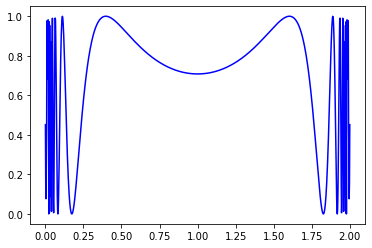

In [16]:
# Hit/Miss method
def f(x):
    return (np.sin(1/(x*(2-x))))**2

#Compute the integral of f(x) between 0 and 2
x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'b-')

#Evaluate the error
N=100000
count=0
for i in range(N):
    x=np.random.random()
    y=np.random.random()
    if y<f(x): 
        count+=1
I=count/N
print("Integral by Monte-Carlo method: ",I)

# Mean value method
def f(x):
    return (np.sin(1/(x*(2-x))))**2

N=100000
x = np.random.uniform(size=N)
a = 0
b = 1
I = ((b-a)/N)*sum(f(x))
print("Integral by Mean value method:",I)
#The two obtained results are quiet similar

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [20]:
#Compute the area of a circle of unit radius, by integrating the function f(x,y)

N = 1000000
r=1 #unit radius
x = np.random.uniform(-1.0,1.0,size=N)
y = np.random.uniform(-1.0,1.0,size=N)
distance = x**2+y**2
points = len(distance[np.sqrt(distance)<=r]) #Points inside the circle

area = 4*(points/N)
print("Area of the circle: ",area)

#Generalize the result for a 10D sphere
def SphereVolumeDimN(dim, N):
    point = np.random.uniform(-1.0, 1.0, size=[N,dim])
    distance = np.apply_along_axis(np.linalg.norm, 1, point)
    points_sphere = len(distance[distance<=1])
    return np.power(2.0, dim) * (points_sphere / N)

print("Volume of a 10D sphere: ",SphereVolumeDimN(10, 100000))
#I try to use this method to calculate the previous area of the circle
print("Area of a circle: ", SphereVolumeDimN(2,100000))
#In fact, the two results are the same

Area of the circle:  3.144064
Volume of a 10D sphere:  2.52928
Area of a circle:  3.14124


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [23]:
def f(x):
    return x**-0.5/(np.exp(x)+1)

def w(x):
    return np.sqrt(x)**-1

def inv_transform(x): #inverse transform method 
    return np.square(x)/4

n = int(1e6)
x = np.random.uniform(0,2,size=n)
ws = inv_transform(x)
I = (np.sum(f(ws)/w(ws))*2)/n

print("The value of the integral I is:",np.round((I),2))

The value of the integral I is: 0.84
